In [1]:
Fs = 16000
sr = 16000
n_fft = 1024
n_mfcc = 64
hop_length = 512
win_length = 1024

In [2]:
%cd /content/drive/MyDrive/Spectrograms_xx

/content/drive/MyDrive/Spectrograms_xx


In [3]:
import numpy as np
import librosa
import os

In [4]:

def stft_to_mfcc(x,Fs,n_mfcc):
    x_mfcc = []
    xt = x.T
    for i in range(0,312,4):
        mfcc = librosa.feature.mfcc(S = xt[:][i:i+4].T, sr = Fs, n_mfcc = n_mfcc)
        if(len(mfcc[0])*(len(mfcc))==64*4):
            x_mfcc.append(mfcc)
        # if(len(x_mfcc[0])==78):break
    return np.array(x_mfcc)

In [5]:
X_music=[]
for i in range(1,90):
  if i!=19:
    x = np.load('Music/music_{num}_.npy'.format(num=i))
    x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
    for j in range(x_mfcc.shape[0]):
      X_music.append(x_mfcc[j])



X_music = np.array(X_music)

In [6]:
X_music.shape

(6848, 64, 4)

In [7]:
X_speech=[]
for i in range(1,90):
  x = np.load('Speech/speech_{num}_.npy'.format(num=i))
  x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
  for j in range(x_mfcc.shape[0]):
    X_speech.append(x_mfcc[j])
  
X_speech = np.array(X_speech)

In [8]:
X_speech.shape

(6818, 64, 4)

In [9]:
X_silence=[]
for i in range(1,51):
  if i<10:
    x = np.load('Silence/silence_0{num}_.npy'.format(num=i))
  else:
    x = np.load('Silence/silence_{num}_.npy'.format(num=i))
  x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
  for j in range(x_mfcc.shape[0]):
    X_silence.append(x_mfcc[j])

X_silence = np.array(X_silence)

In [10]:
X_silence.shape

(3900, 64, 4)

In [11]:
X = []
Y = []

for i in range(X_music.shape[0]):
  X.append(X_music[i])
  Y.append([1,0,0])

for i in range(X_speech.shape[0]):
  X.append(X_speech[i])
  Y.append([0,1,0])

for i in range(X_silence.shape[0]):
  X.append(X_silence[i])
  Y.append([0,0,1])


X = np.array(X)
Y = np.array(Y)

In [12]:
Y.shape

(17566, 3)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=3)

In [15]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,TimeDistributed
from keras.layers import Convolution2D, MaxPooling2D,MaxPooling1D,Conv1D
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils import np_utils
from sklearn import metrics
import random
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [16]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(64,4)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 62, 128)           1664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3968)              0         
                                                                 
 dense (Dense)               (None, 64)                254016    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [17]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20,batch_size=12,validation_data=(X_val,Y_val))

Epoch 1/20
1245/1245 [==============================] - 10s 7ms/step - loss: 0.6874 - accuracy: 0.8383 - val_loss: 0.0811 - val_accuracy: 0.9822
Epoch 2/20
1245/1245 [==============================] - 8s 7ms/step - loss: 0.2404 - accuracy: 0.8983 - val_loss: 0.0582 - val_accuracy: 0.9841
Epoch 3/20
1245/1245 [==============================] - 9s 7ms/step - loss: 0.2022 - accuracy: 0.9150 - val_loss: 0.0559 - val_accuracy: 0.9860
Epoch 4/20
1245/1245 [==============================] - 8s 7ms/step - loss: 0.1693 - accuracy: 0.9366 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 5/20
1245/1245 [==============================] - 9s 7ms/step - loss: 0.1320 - accuracy: 0.9524 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 6/20
1245/1245 [==============================] - 9s 7ms/step - loss: 0.1397 - accuracy: 0.9508 - val_loss: 0.0251 - val_accuracy: 0.9924
Epoch 7/20
1245/1245 [==============================] - 9s 7ms/step - loss: 0.1254 - accuracy: 0.9500 - val_loss: 0.0175 - val_accuracy

In [19]:
import matplotlib.pyplot as plt


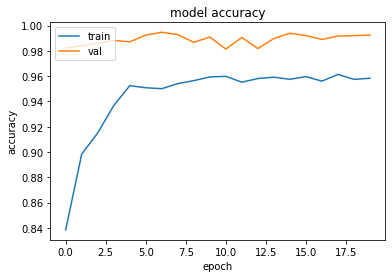

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()